In [1]:
import pandas as pd

In [2]:
#df = pd.read_csv('..\\..\\Data\\tp1\\events.csv')
df = pd.read_csv('..\\..\\Data\\tp1\\events.csv', low_memory=False)

In [3]:
df.head(1)

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.groupby('event').size().sort_values(ascending=False)

event
viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
dtype: int64

In [24]:
top5sku=df[df['event'] == 'conversion'].groupby('sku').size().sort_values(ascending=False).to_frame(name='cantidad').reset_index().head(5)
print(top5sku)

      sku  cantidad
0  6371.0        30
1  6370.0        18
2  7631.0        17
3  2692.0        16
4  3371.0        14


In [6]:
df.groupby('person').size().sort_values(ascending=False).head(10)

person
71492f2b    2771
6b07be7b    2770
285101a1    2140
3e34b3cf    1877
2d5a84c1    1800
5f25cb5d    1797
5af7e2bc    1773
3b5a5833    1705
d7e60792    1352
cd6e0b8d    1254
dtype: int64

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import squarify


In [8]:
values = df.groupby('event').size().sort_values(ascending=False).to_frame(name='cantidad').reset_index()


In [9]:

# treemap parameters
x = 0.
y = 0.
width = 200.
height = 100.
cmap = matplotlib.cm.viridis



In [10]:
# colres
mini, maxi = values.cantidad.min(), values.cantidad.max()
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in values.cantidad]



In [11]:
# labels for squares
labels = ["%s\n%d" % (label) for label in zip(values.event, values.cantidad)]


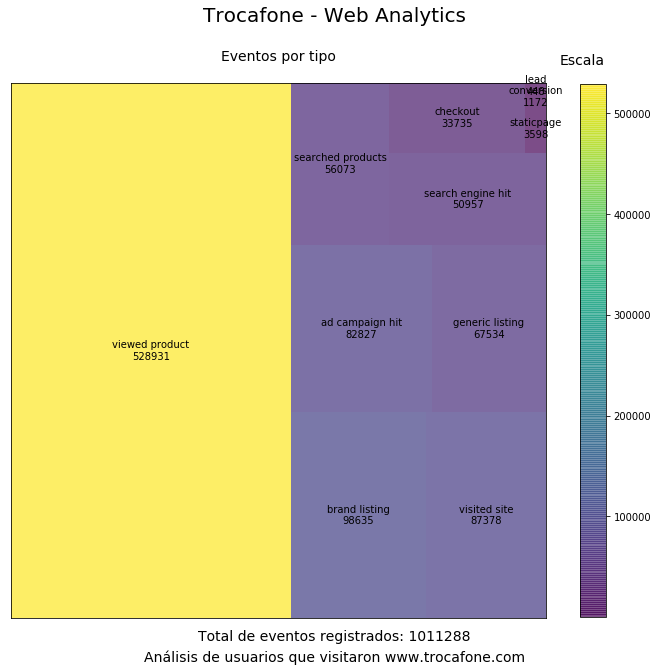

In [12]:
# make plot
fig = plt.figure(figsize=(12, 10))
fig.suptitle("Trocafone - Web Analytics", fontsize=20)
ax = fig.add_subplot(111, aspect="equal")
ax = squarify.plot(values.cantidad, color=colors, label=labels, ax=ax, alpha=.7 ,)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("Eventos por tipo\n", fontsize=14)


# color bar
# create dummy invisible image with a color map
img = plt.imshow([values.cantidad], cmap=cmap, alpha=.7)
img.set_visible(False)
fig.colorbar(img, orientation="vertical", shrink=.98)
fig.text(.76, .9, "Escala", fontsize=14)
fig.text(.5, 0.1, "Total de eventos registrados: %d" % (values.cantidad.sum()), fontsize=14, ha="center")
fig.text(.5, 0.07, "Análisis de usuarios que visitaron www.trocafone.com", fontsize=14, ha="center")

plt.show()

In [14]:
from paretochart import pareto

In [21]:
valores = top5sku.cantidad
labels = top5sku.sku

<BarContainer object of 5 artists>

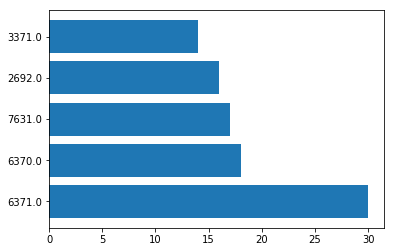

In [26]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
ax.barh(top5sku.sku, top5sku.cantidad)